# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')

In [2]:
# Inicialmente se crea una lista vacia la cual se quiere correr de 1995 a 2017 que son los archivos que tenemos 
x = []

In [3]:
# Para correr la lista se crea un ciclo el cual lee el nombre del archivo y la extensión
# Finalmente antes de pegar las listas (.append) se transpone la tabla de forma horizontal a vertical 
# De esta forma se logra trabajar más fácilmente con los datos

for n in range(1995,2018):
    if n < 2000:
        skip = 3
    else:
        skip = 2
    nombrearchivo = 'Precio_Bolsa_Nacional_($kwh)_' + str(n) 
    if n >= 2016:
        nombrearchivo += '.xls'
    else:
        nombrearchivo += '.xlsx'
    y = pd.read_excel(nombrearchivo, skiprows=skip, parse_cols=24)
    z = pd.melt(y, id_vars = ['Fecha'], var_name = 'Hora', value_name = 'PrecioBolsa') 
    z['Fecha'] = pd.to_datetime(z['Fecha']) # Convierte los datos a tiempo
    z['Hora'] = pd.to_numeric(z['Hora']) # Convierte los datos en tipo numerico
    z['Tiempo'] = z['Fecha'] + pd.to_timedelta(z['Hora'], unit='h')
    x.append(z)
        
total=pd.concat(x)   
total.sort_values(['Tiempo'], ascending=True, inplace=True)
total.set_index('Tiempo', drop=True, inplace=True)
print(len(total))
total

191088


,Fecha,Hora,PrecioBolsa
Tiempo,,,
1995-07-20 00:00:00,1995-07-20,0,NaN
1995-07-20 01:00:00,1995-07-20,1,1.073
1995-07-20 02:00:00,1995-07-20,2,1.073
1995-07-20 03:00:00,1995-07-20,3,1.073
1995-07-20 04:00:00,1995-07-20,4,1.073
1995-07-20 05:00:00,1995-07-20,5,1.073
1995-07-20 06:00:00,1995-07-20,6,1.073
1995-07-20 07:00:00,1995-07-20,7,1.073
1995-07-20 08:00:00,1995-07-20,8,1.074


In [4]:
# la columna ['Fecha'] es la columna que no se agrupa
# la columna 'Hora' será la columna que contiene las columnas agrupadas es decir de la hora 0 a la hora 23
# la columna 'PrecioBolsa contiene los datos de los precios


**2.--** Compute e imprima el número de registros con datos faltantes.

In [5]:
# Los datos faltantes al pasar la tabla de forma vertical se aumentan 
# pasando de 28 regitros a 216 registros por fecha y 238 por precio
# la función isnull() permite identificar los datos faltantes devolviendo un objeto booleano 
total.isnull().sum()

Fecha          216
Hora             0
PrecioBolsa    238
dtype: int64

**3.--** Compute e imprima el número de registros duplicados.

In [6]:
# la función .duplicated() permite identificar los datos duplicados
len(total[total.duplicated()])

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [7]:
# la función drop permite eliminar los datos faltantes y los datos duplicados
total= total.dropna().drop_duplicates()
len(total)

189091

**5.--** Compute y grafique el precio primedio diario.

E:\Documentos\lib\site-packages\dateutil\parser.py:98: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  while nextchar == '\x00':
E:\Documentos\lib\site-packages\dateutil\parser.py:123: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif nextchar == '.':


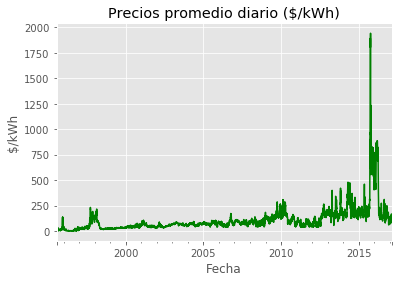

In [8]:
# Generamos columnas para año, mes, hora, día y día de la semana de esta manera podemos filtrar los días laborales, sabados y domingos
# Para graficar el precio promedio diario se llama la lista [día] como 'D' y la lista [PrecioBolsa]
# la función .timegrouper() permite agrupar por tiempo

PrecioBolsa = total.drop(['Fecha', 'Hora'],axis=1)
PrecioBolsa ['Año'] = PrecioBolsa.index.year
PrecioBolsa ['Mes'] = PrecioBolsa.index.month
PrecioBolsa ['Día'] = PrecioBolsa.index.day
PrecioBolsa ['Hora'] = PrecioBolsa.index.hour
PrecioBolsa ['DíaSemana'] = PrecioBolsa.index.weekday 

PrecioBolsa.groupby(pd.TimeGrouper('D'))['PrecioBolsa'].mean().plot(color = 'g')
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
plt.title('Precios promedio diario ($/kWh)')
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

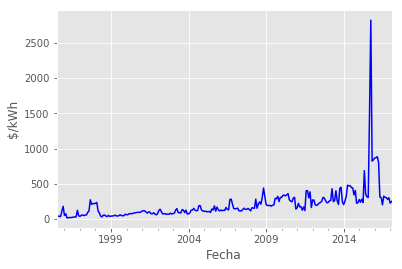

In [9]:
# Para graficar el precio máximo mes se llama la lista [mes] como 'M' y la lista [PrecioBolsa]

PrecioBolsa.groupby(pd.TimeGrouper('M'))['PrecioBolsa'].max().plot(color = 'b')
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.


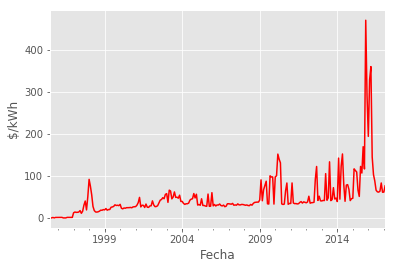

In [10]:
# Para graficar el precio minimo mes se llama la lista [mes] como 'M' y la lista [PrecioBolsa]

PrecioBolsa.groupby(pd.TimeGrouper('M'))['PrecioBolsa'].min().plot(color = 'r')
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

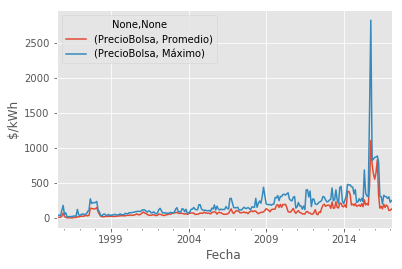

In [11]:
PrecioBolsa.groupby(pd.TimeGrouper('M')).agg({'PrecioBolsa':{'Máximo':'max', 'Promedio':'mean'}}).plot()
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

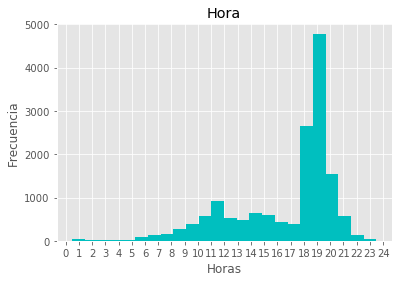

In [12]:
diamax = PrecioBolsa[PrecioBolsa.groupby(pd.TimeGrouper('D'))['PrecioBolsa'].transform(max)== PrecioBolsa['PrecioBolsa']]
diamax[diamax['DíaSemana'].isin(range(0,5))].hist('Hora', bins=24, align='right', color = 'c')
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

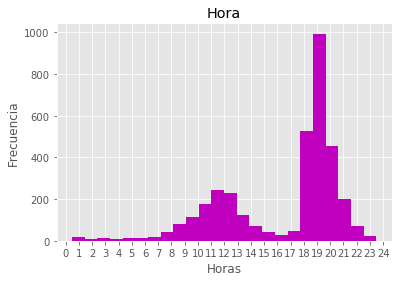

In [13]:
diamax = PrecioBolsa[PrecioBolsa.groupby(pd.TimeGrouper('D'))['PrecioBolsa'].transform(max)== PrecioBolsa['PrecioBolsa']]
diamax[diamax['DíaSemana'].isin([5])].hist('Hora', bins=24, align='right', color = 'm')
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

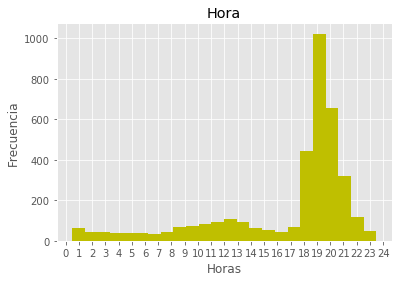

In [14]:
diamax = PrecioBolsa[PrecioBolsa.groupby(pd.TimeGrouper('D'))['PrecioBolsa'].transform(max)== PrecioBolsa['PrecioBolsa']]
diamax[diamax['DíaSemana'].isin([6])].hist('Hora', bins=24, align='right', color = 'y')
plt.xticks(range(0, 25))
plt.ylabel('Frecuencia')
plt.xlabel('Horas')
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [15]:
diamin = PrecioBolsa.groupby(pd.TimeGrouper('D')).min()
yearmin = diamin[diamin.groupby(pd.TimeGrouper('A'))['PrecioBolsa'].transform(min) == diamin['PrecioBolsa']]
yearmin[['PrecioBolsa']]

,PrecioBolsa
Tiempo,
1995-07-26,0.000000
1995-07-28,0.000000
1995-07-29,0.000000
1995-07-30,0.000000
1995-07-31,0.000000
1995-08-01,0.000000
1995-10-13,0.000000
1996-05-10,0.000000
1996-06-30,0.000000


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

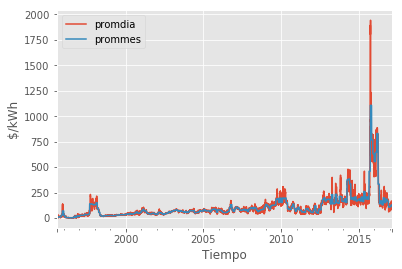

In [16]:
promdia = PrecioBolsa.groupby(pd.TimeGrouper('D')).mean()
promdia['prommes'] = promdia.groupby(pd.TimeGrouper('M'))['PrecioBolsa'].transform('mean')
promdia
promdia.columns.values[0] = 'promdia'
promdia[['promdia','prommes']].plot()
plt.ylabel('$/kWh')
plt.show()

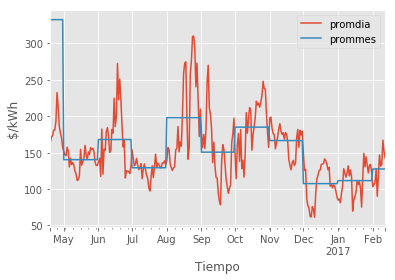

In [17]:
# Para tener una mejor visualización se gráfica los últimos 300 días es decir año 2017
promdia[['promdia','prommes']][-300:].plot()
plt.ylabel('$/kWh')
plt.show()